### **Connecting to drive**

In [1]:
#Reading the training data Subject
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Importing required Libraries**

In [2]:
#Importing all needed libraries
import pandas as pd
import numpy as np #Matric math
import tensorflow as tf #ML
from tensorflow.python.framework import ops
from random import randint
from numpy import array
from numpy import argmax
import keras.backend as K
from tensorflow.keras import models
from numpy import array_equal
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Input
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import sys
import os
from scipy.io import loadmat
from scipy.io import loadmat

# sys.path.append(os.path.abspath("/Users/henda/anaconda3/Lib/site-packages"))
# from rnn_utils import *
# from public_tests import *
ops.reset_default_graph()

tf.compat.v1.reset_default_graph() #Clearning cache
sess=tf.compat.v1.InteractiveSession()





Processing S10, Data shape: (9138, 119)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 15, 32)         │         5,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 15, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 15, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 15, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 15, 64)         │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 15, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 15, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 15, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 15, 128)        │        24,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 15, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 15, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 15, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 15, 400)        │        51,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 15, 2000)       │    11,208,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 2000)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 2000)           │    24,008,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 22)             │        44,022 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,348,998 (134.85 MB)

 Trainable params: 35,348,550 (134.84 MB)

 Non-trainable params: 448 (1.75 KB)

Available labels and their counts: {np.float64(0.0): np.int64(5002), np.float64(1.0): np.int64(388), np.float64(2.0): np.int64(275), np.float64(3.0): np.int64(215), np.float64(4.0): np.int64(205), np.float64(5.0): np.int64(170), np.float64(6.0): np.int64(156), np.float64(7.0): np.int64(318), np.float64(8.0): np.int64(210), np.float64(9.0): np.int64(295), np.float64(10.0): np.int64(316), np.float64(11.0): np.int64(292), np.float64(12.0): np.int64(246), np.float64(13.0): np.int64(166), np.float64(14.0): np.int64(192), np.float64(15.0): np.int64(206), np.float64(16.0): np.int64(287), np.float64(17.0): np.int64(199)}
Test labels for fold 1: [ 9. 14. 10. 12.]
Training input shape: (8089, 60), Training target shape: (8089, 22)
Testing input shape: (1049, 60), Testing target shape: (1049, 22)
LSTM training input shape: (8075, 15, 60), LSTM training output shape: (8075, 22)
LSTM testing input shape: (1035, 15, 60), LSTM testing output shape: (1035, 22)
Epoch 1/200
202/202 ━━━━━━━━━━━━━━━━━━━━ 

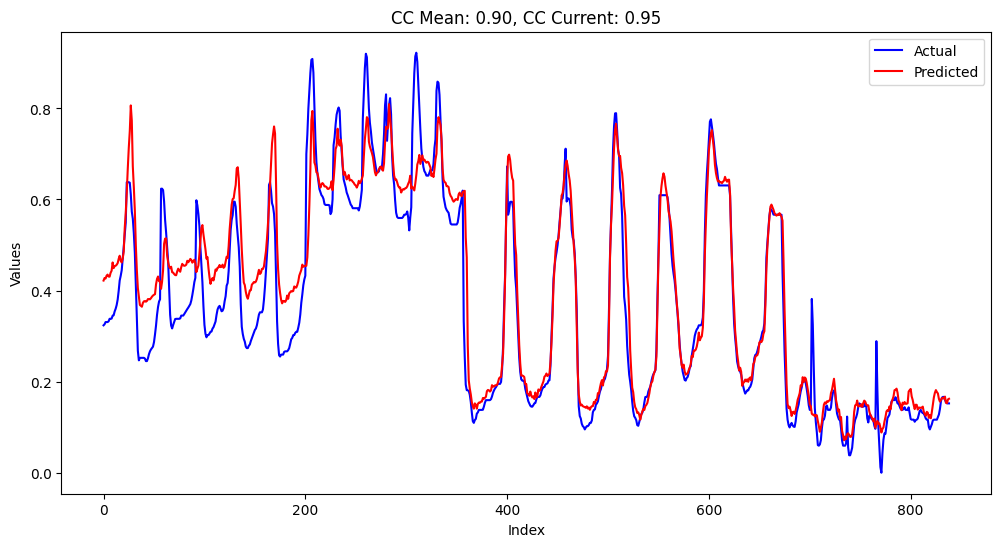

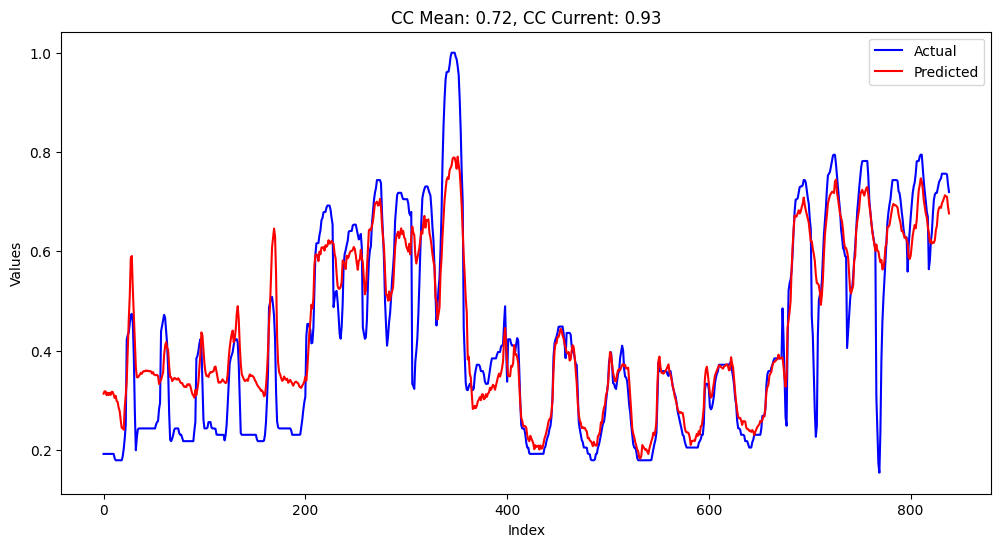

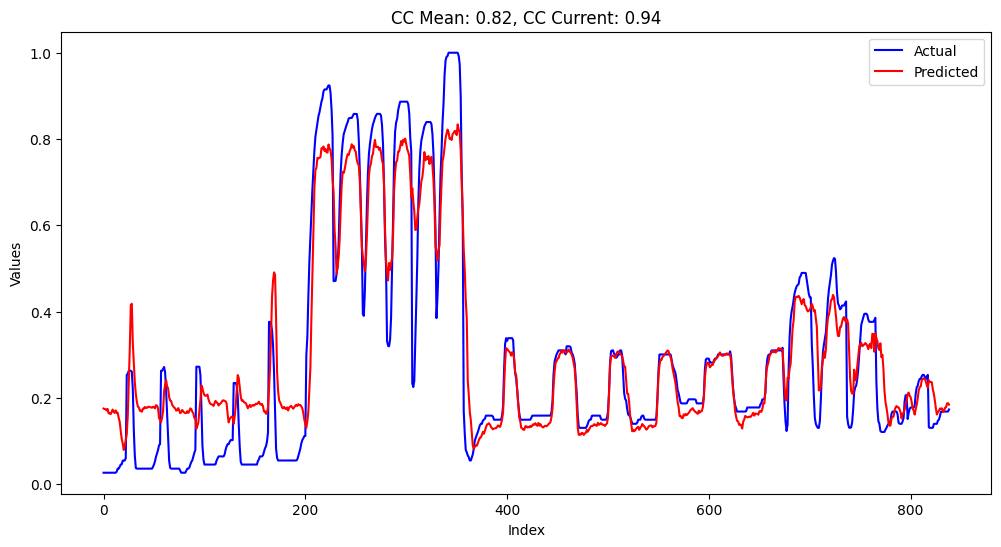

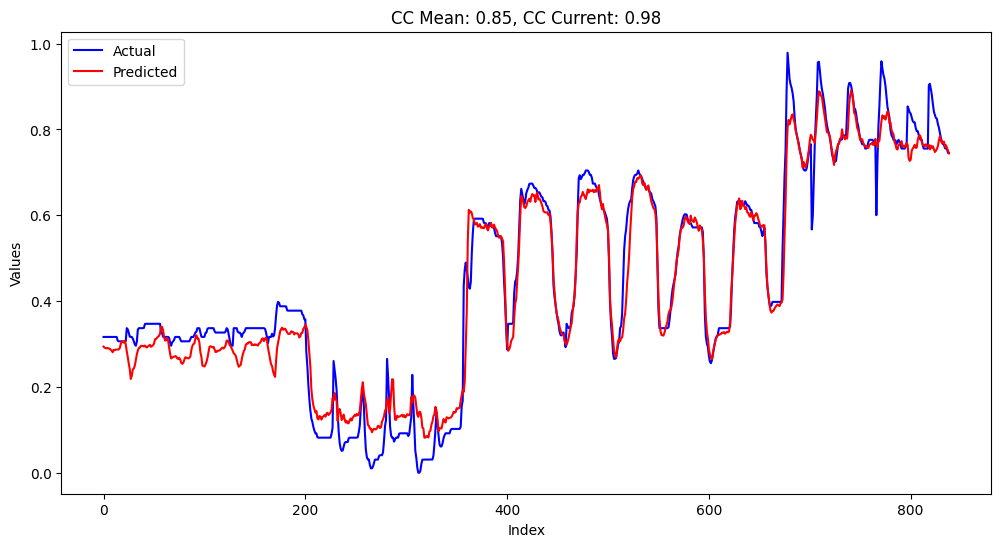

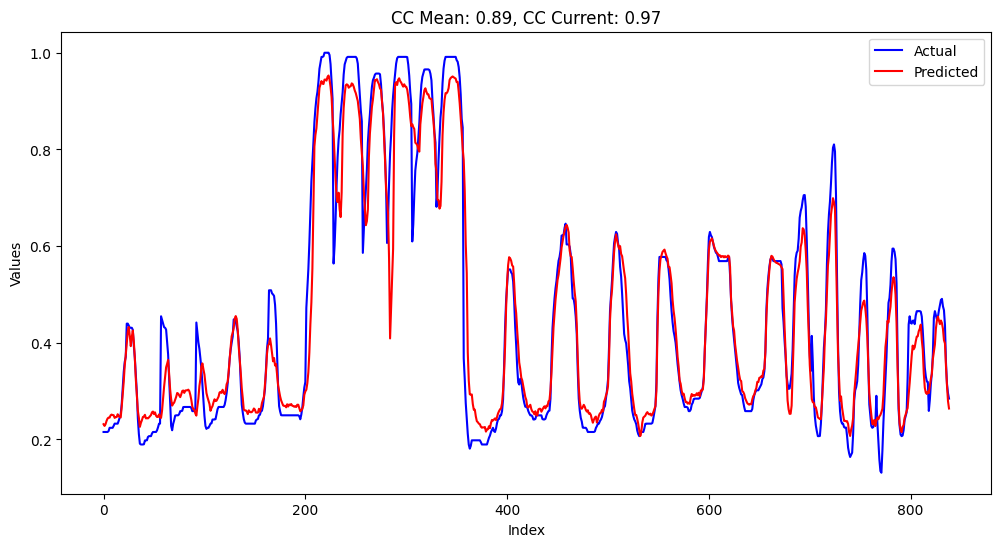

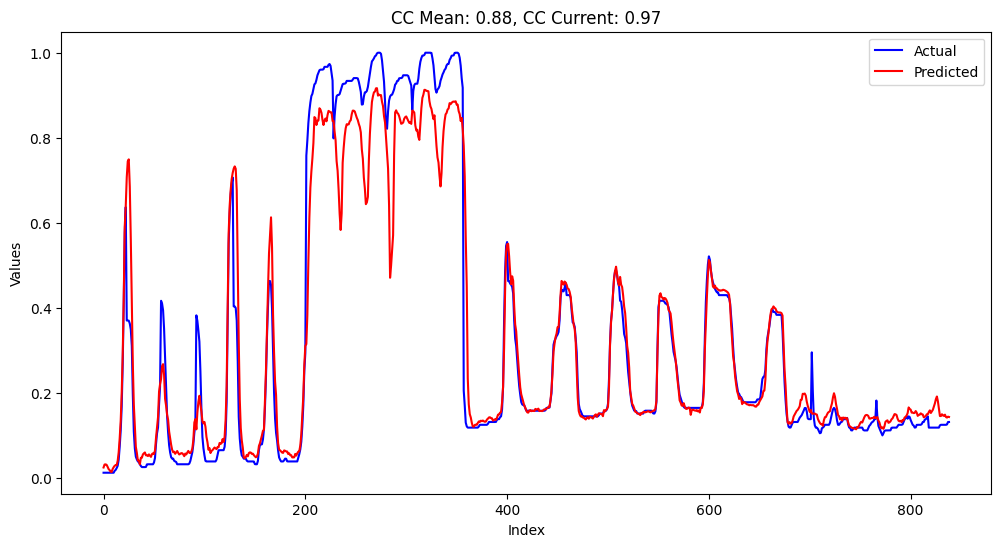

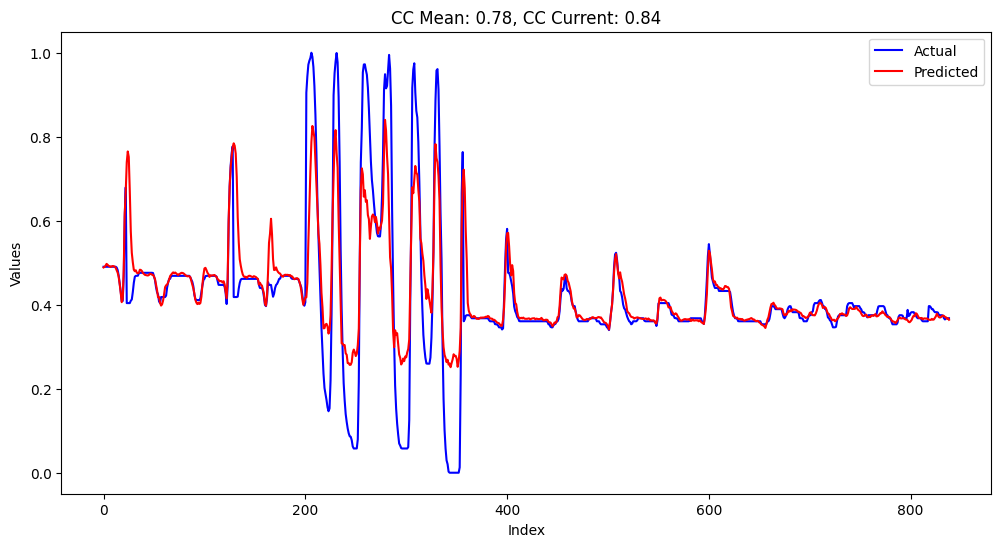

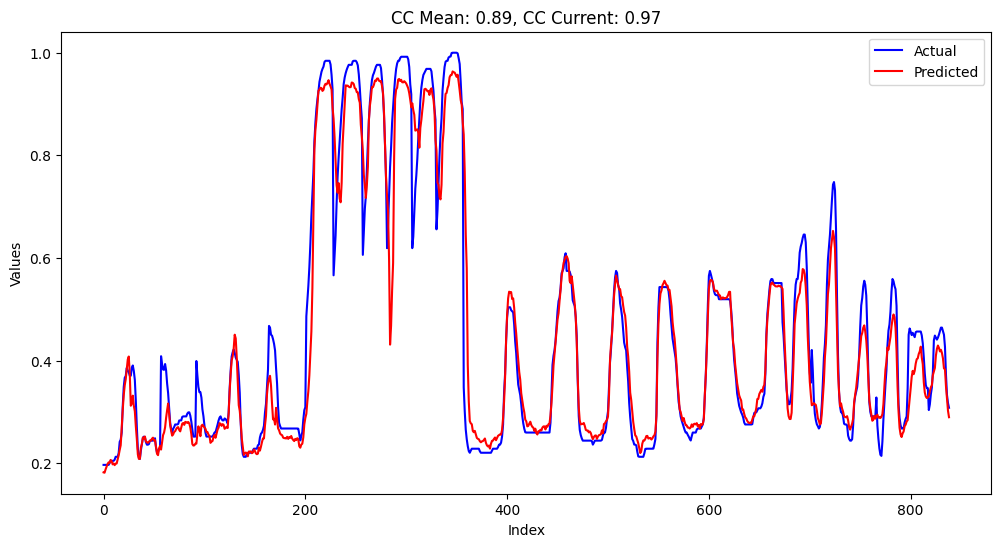

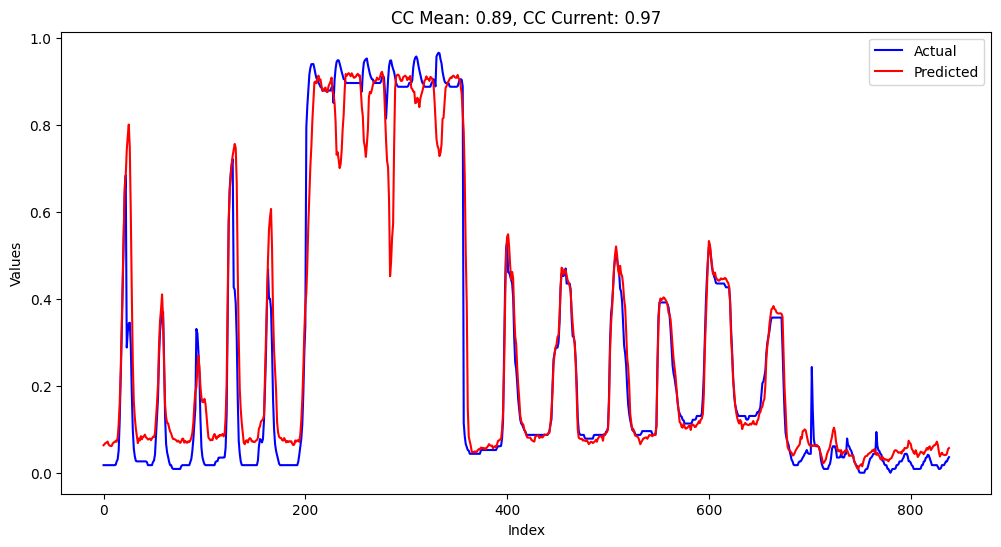

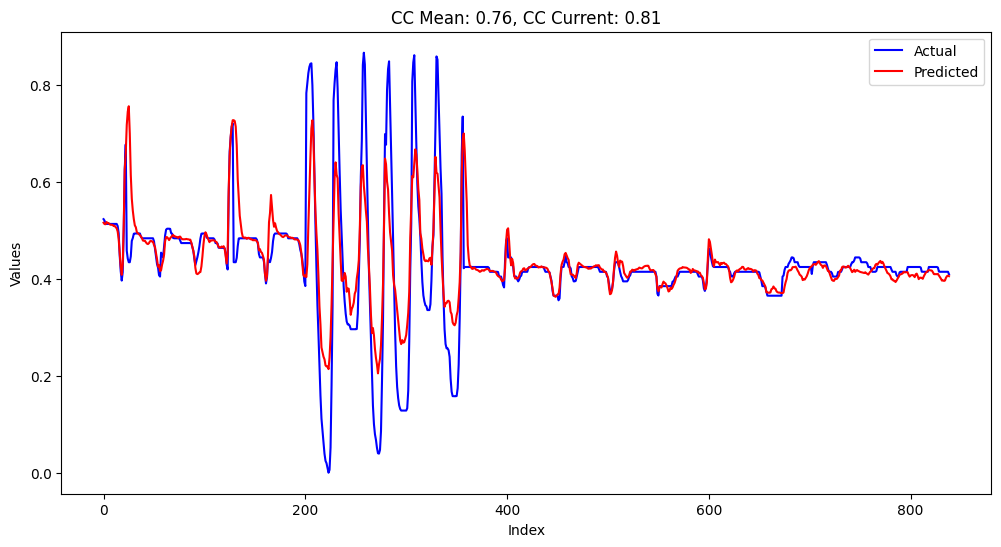

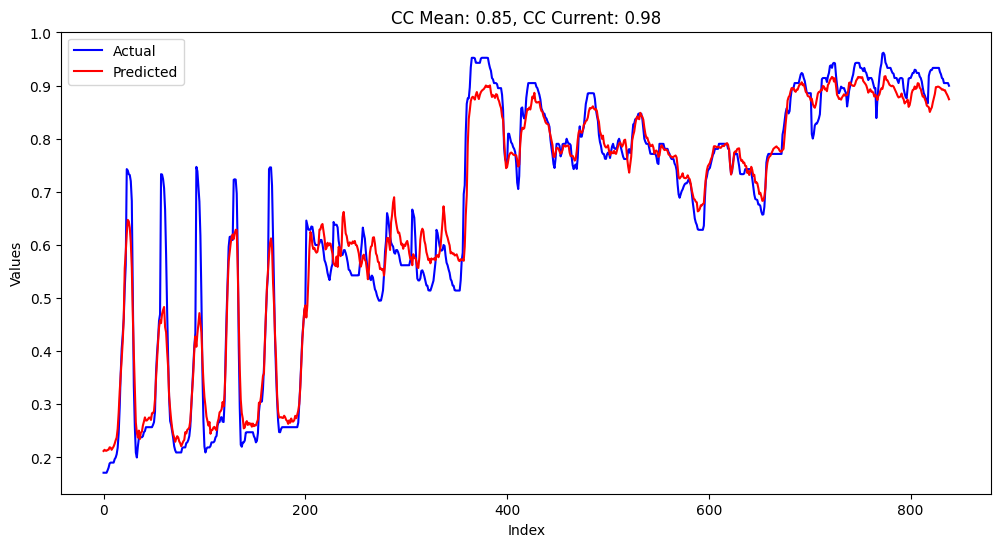

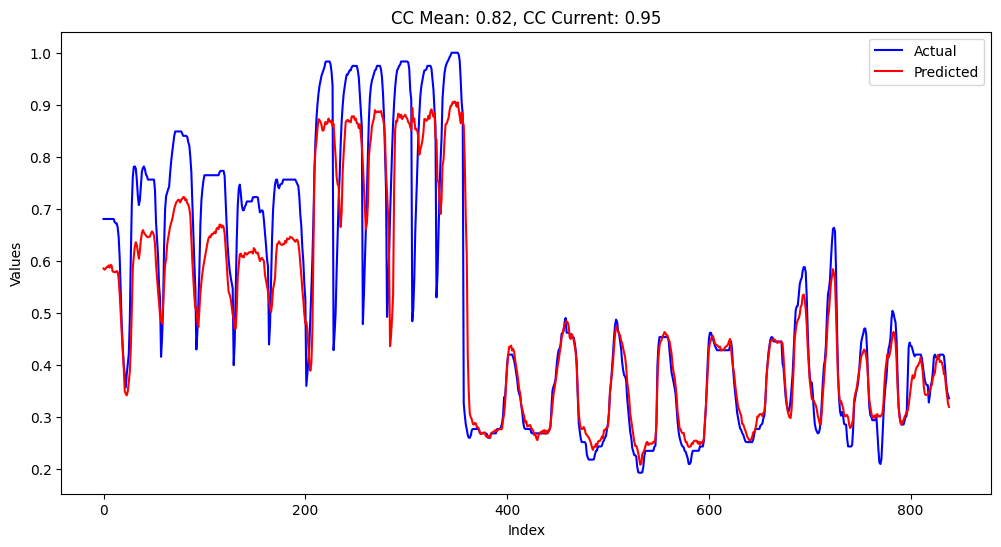

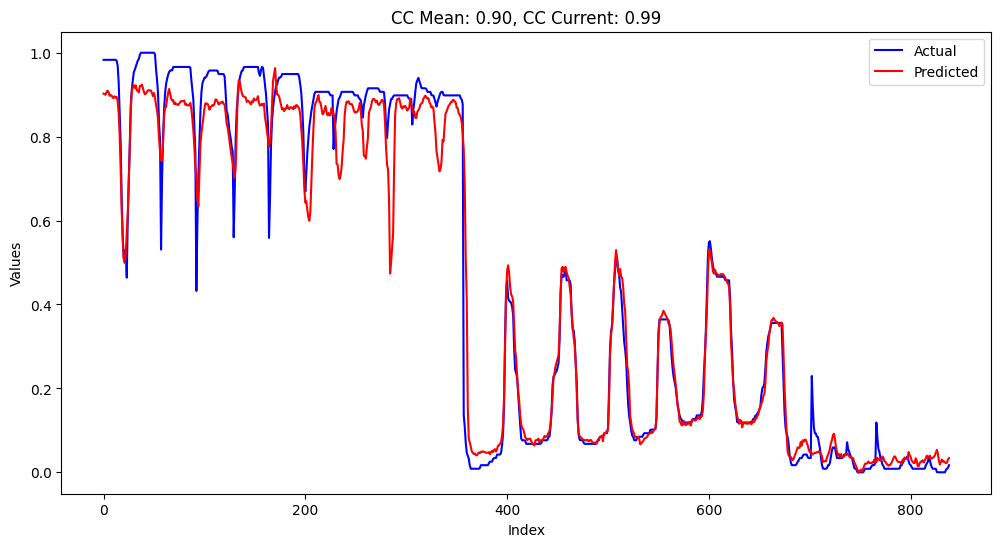

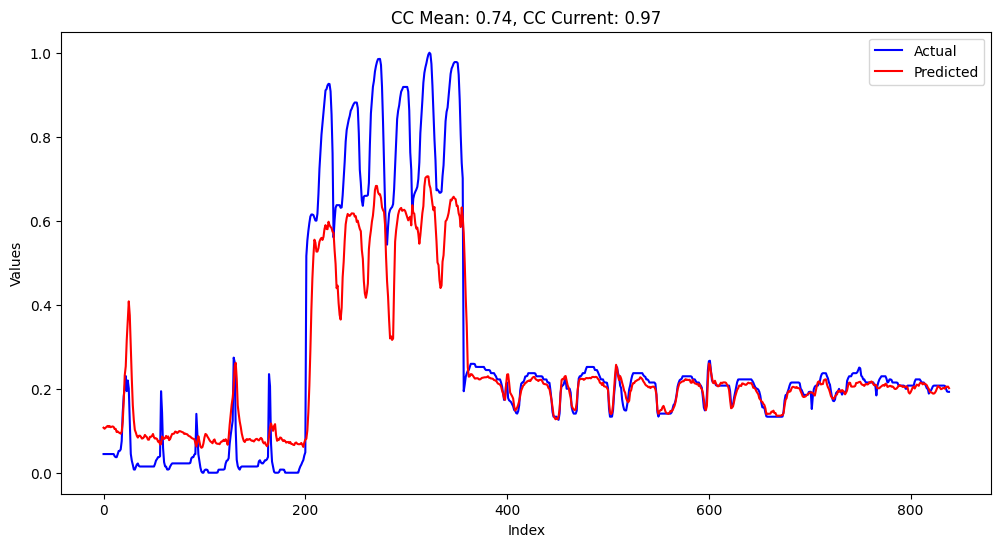

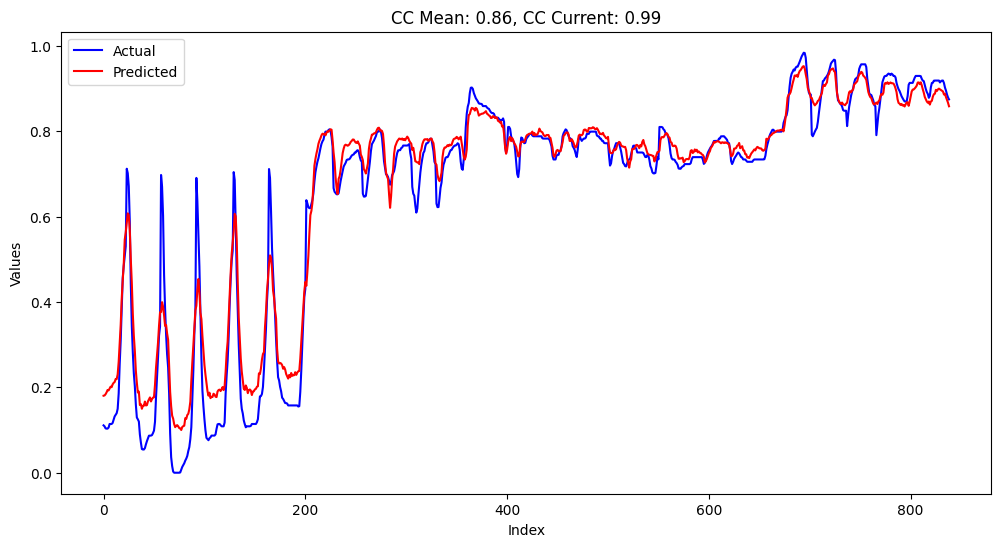

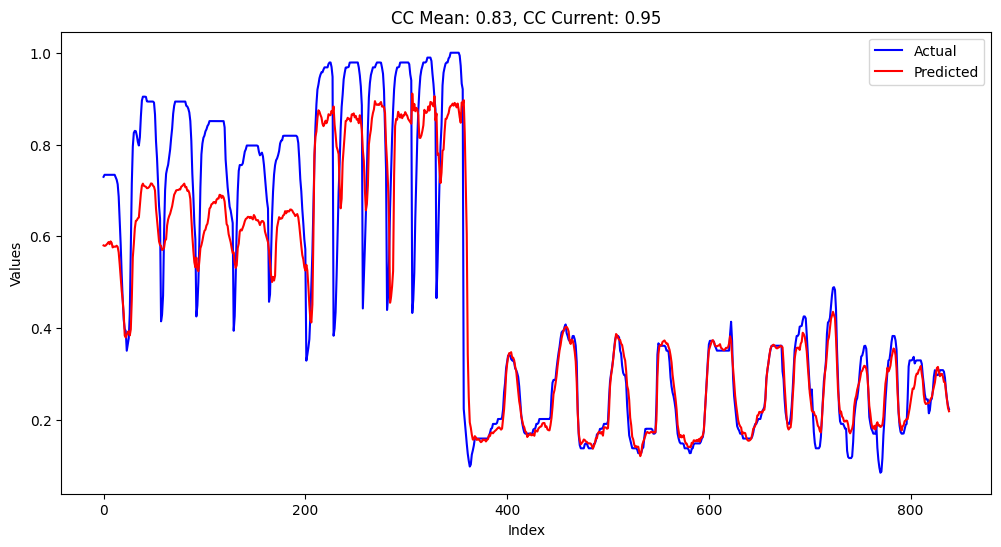

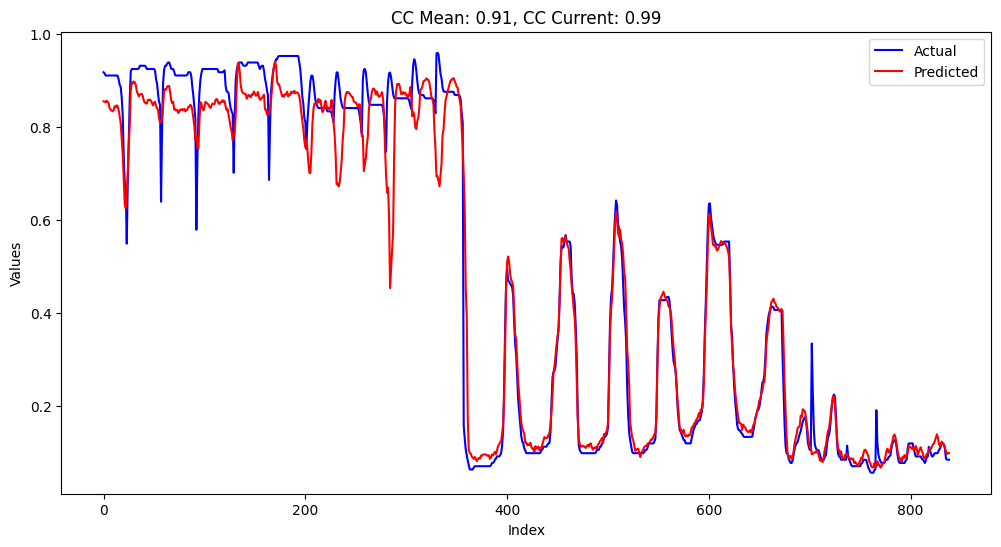

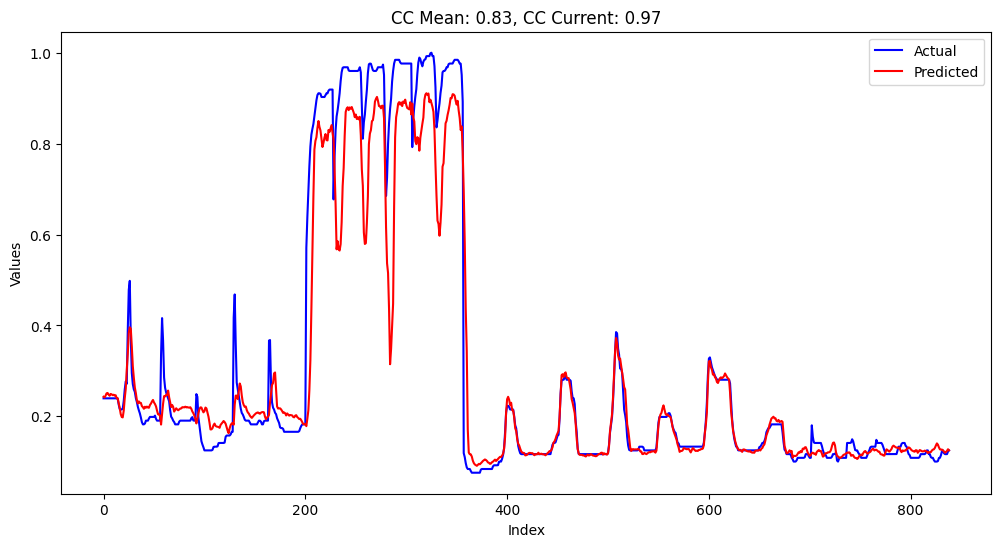

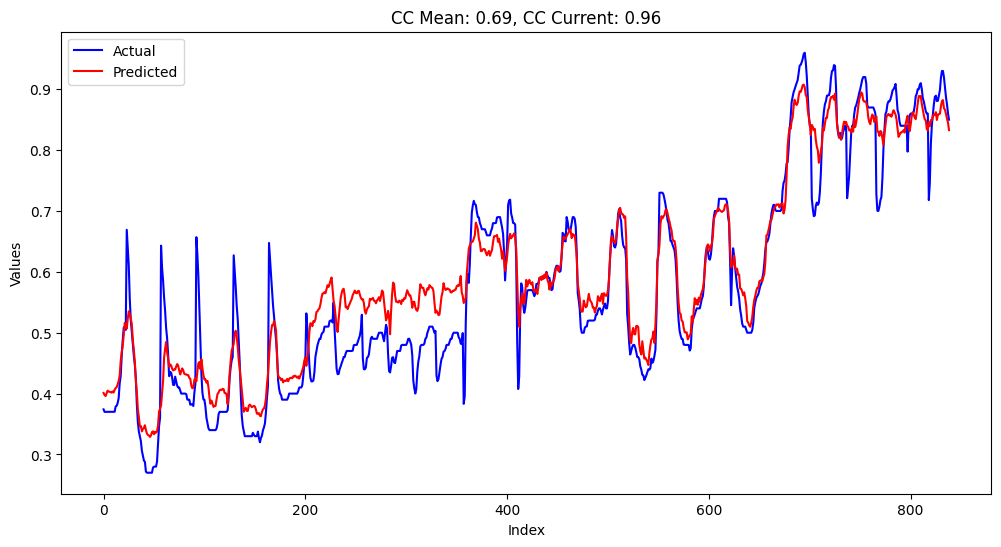

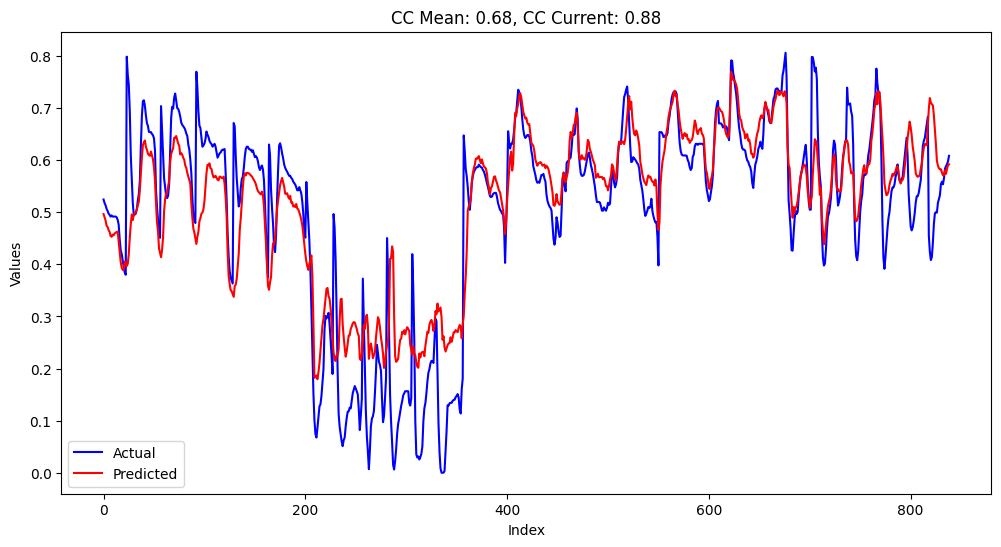

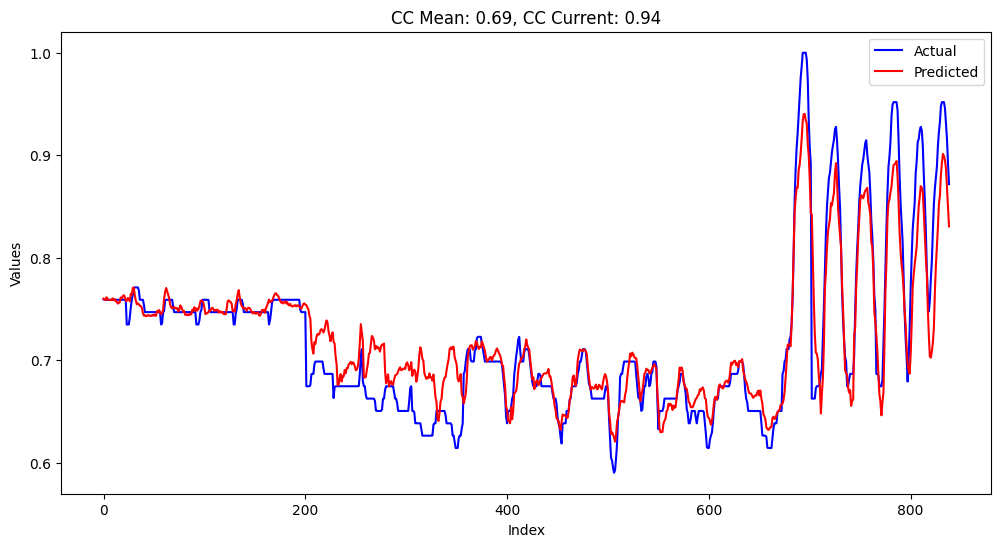

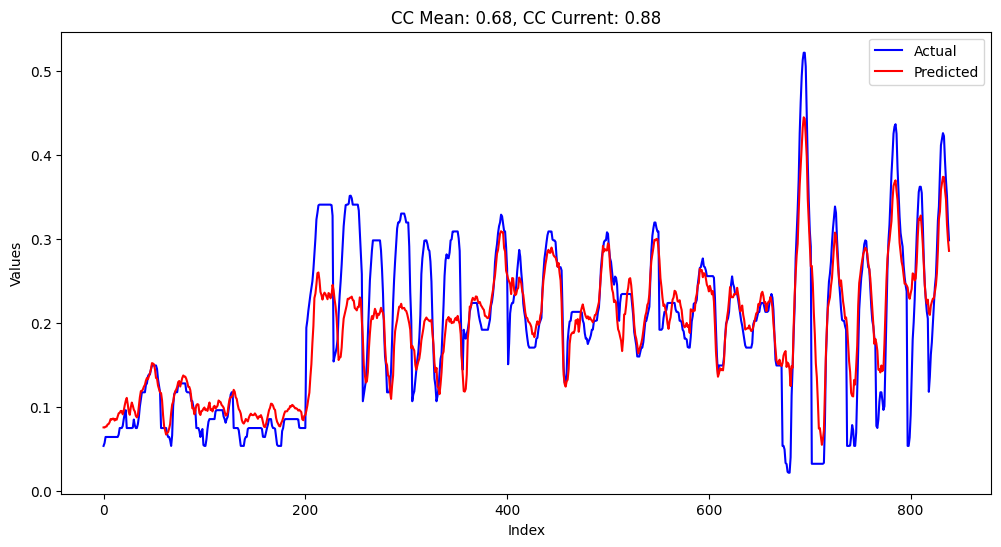


Processing S11, Data shape: (9124, 119)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 15, 32)         │         5,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 15, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 15, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 15, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 15, 64)         │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 15, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 15, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 15, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 15, 128)        │        24,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 15, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 15, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 15, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 15, 400)        │        51,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 15, 2000)       │    11,208,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 2000)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 2000)           │    24,008,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 22)             │        44,022 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,348,998 (134.85 MB)

 Trainable params: 35,348,550 (134.84 MB)

 Non-trainable params: 448 (1.75 KB)

Available labels and their counts: {np.float64(0.0): np.int64(2439), np.float64(1.0): np.int64(395), np.float64(2.0): np.int64(394), np.float64(3.0): np.int64(392), np.float64(4.0): np.int64(393), np.float64(5.0): np.int64(395), np.float64(6.0): np.int64(390), np.float64(7.0): np.int64(394), np.float64(8.0): np.int64(391), np.float64(9.0): np.int64(392), np.float64(10.0): np.int64(393), np.float64(11.0): np.int64(395), np.float64(12.0): np.int64(399), np.float64(13.0): np.int64(394), np.float64(14.0): np.int64(395), np.float64(15.0): np.int64(395), np.float64(16.0): np.int64(395), np.float64(17.0): np.int64(383)}
Test labels for fold 1: [2. 3. 9. 7.]
Training input shape: (7552, 60), Training target shape: (7552, 22)
Testing input shape: (1572, 60), Testing target shape: (1572, 22)
LSTM training input shape: (7538, 15, 60), LSTM training output shape: (7538, 22)
LSTM testing input shape: (1558, 15, 60), LSTM testing output shape: (1558, 22)
Epoch 1/200
189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 

In [ ]:

start_subject = 10

# Loop through subjects from start_subject to S40
for subject_id in range(start_subject, 41):
    subject_name = f"S{subject_id}"


    # Update the path to load data dynamically
    data_path = f'/content/drive/My Drive/Colab Notebooks/dataset wstimi/8 Features/{subject_name}_E1.mat'
    training_data = loadmat(data_path)
    Data = training_data["Data"]
    Data1 = np.array(Data)
    print(f"\nProcessing {subject_name}, Data shape: {Data1.shape}\n")

    from tensorflow.keras.models import Model
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Conv1D, BatchNormalization, Activation, MaxPooling1D, Dense, Dropout, LSTM, Bidirectional, Add, LayerNormalization, Input, MultiHeadAttention, GlobalAveragePooling1D
    from tensorflow.keras import activations


    # Define model input
    timesteps =15 # Number of timesteps (sequence length)
    input_features = 60
    numResponses = 22

    #Define CNN-LSTM Model
    model = Sequential()

    # 1st convolutional layer
    model.add(Conv1D(32, kernel_size=3, strides=1, padding='same', use_bias=False, input_shape=(timesteps, input_features)))
    model.add(BatchNormalization())
    model.add(Activation(activations.relu))
    model.add(MaxPooling1D(pool_size=2, strides=1, padding='same'))

    # 2nd convolutional layer
    model.add(Conv1D(64, kernel_size=3, strides=1, padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(Activation(activations.relu))
    model.add(MaxPooling1D(pool_size=2, strides=1, padding='same'))

    # 3rd convolutional layer
    model.add(Conv1D(128, kernel_size=3, strides=1, padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(Activation(activations.relu))
    model.add(MaxPooling1D(pool_size=2, strides=1, padding='same'))


    # Dense layer before LSTM
    model.add(Dense(400, activation='linear'))

    # Bidirectional LSTM layers
    model.add(Bidirectional(LSTM(1000, return_sequences=True)))
    model.add(Dropout(0.2))

    model.add(Bidirectional(LSTM(1000)))
    model.add(Dropout(0.2))
    # Final output layer for predicting 22 degrees of freedom (DOFs)
    model.add(Dense(numResponses, activation='linear'))  # Adjust the number of outputs for your case (22 DOFs)

    # Print model summary
    model.summary()

    import numpy as np
    import math
    from sklearn.metrics import mean_squared_error
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    from tensorflow.keras.optimizers import Adam


    sequence_length = 15  # Define sequence length for LSTM input
    n_features = 60  # Number of input features

    # Initialize storage for Pearson correlation and MSE for each fold
    pearson = {}
    mse = {}
    for i in range(1, 23):
      pearson[i] = []
      mse[i] = []

    # Labels range from 1 to 17 (excluding 0)
    labels = list(range(1, 18)) #for E1
    # labels = list(range(18, 41)) #for E2 23 movements



    # Check unique labels in Data1 and their counts (assuming the label is in the last column)
    unique_labels, counts = np.unique(Data1[:, -1], return_counts=True)
    available_labels = dict(zip(unique_labels, counts))

    # Print available labels and counts for debugging
    print("Available labels and their counts:", available_labels)

    # Filter out labels that have data
    valid_labels = [label for label, count in available_labels.items() if count > 0 and label != 0]

    if not valid_labels:
      raise ValueError("No valid labels found in dataset.")

    # Loop over 10-fold cross-validation
    for i in range(1, 11):
      # Randomly select 3 different labels for testing
      test_labels = np.random.choice(valid_labels, 4, replace=False)
      print(f"Test labels for fold {i}: {test_labels}")

      # Split the data into training and testing based on the 3 selected labels
      D_test = Data1[np.isin(Data1[:, -1], test_labels)]  # Test data for the selected labels
      D_train = Data1[~np.isin(Data1[:, -1], test_labels)]  # Training data for the remaining labels

      X_train = D_train[:, 96:118]  # Target for training
      Z_train = D_train[:, 0:60]  # Input features for training

      X_test = D_test[:, 96:118]  # Target for testing
      Z_test = D_test[:, 0:60 ]  # Input features for testing

      # X_train = D_train[:, 96:118]  # Target for training
      # Z_train = D_train[:, 0:96]  # Input features for training

      # X_test = D_test[:, 96:118]  # Target for testing
      # Z_test = D_test[:, 0:96 ]  # Input features for testing

      print(f"Training input shape: {Z_train.shape}, Training target shape: {X_train.shape}")
      print(f"Testing input shape: {Z_test.shape}, Testing target shape: {X_test.shape}")

      # Prepare input and output for LSTM (training)
      n_sequences_train = len(Z_train) - sequence_length + 1
      in_train = np.zeros((n_sequences_train, sequence_length, n_features))
      out_train = np.zeros((n_sequences_train, X_train.shape[1]))  # Output shape should match target

      for j in range(n_sequences_train):
          in_train[j] = Z_train[j:j + sequence_length]
          out_train[j] = X_train[j + sequence_length - 1]  # Target is the last step in the sequence

      # Prepare input and output for LSTM (testing)
      n_sequences_test = len(Z_test) - sequence_length + 1
      in_test = np.zeros((n_sequences_test, sequence_length, n_features))
      out_test = np.zeros((n_sequences_test, X_test.shape[1]))

      for j in range(n_sequences_test):
          in_test[j] = Z_test[j:j + sequence_length]
          out_test[j] = X_test[j + sequence_length - 1]  # Target is the last step in the sequence

      # Print the shape of the prepared data for sanity check
      print(f"LSTM training input shape: {in_train.shape}, LSTM training output shape: {out_train.shape}")
      print(f"LSTM testing input shape: {in_test.shape}, LSTM testing output shape: {out_test.shape}")

      ######### Model Training ##########
      # Compile the model with Adam optimizer and Mean Squared Error loss
      optimizer = Adam(learning_rate=0.001)  # Initial learning rate
      model.compile(optimizer=optimizer, loss='mean_squared_error')

      # ReduceLROnPlateau callback to dynamically reduce the learning rate if the model stops improving
      reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

      # Early stopping to prevent overfitting
      early_stopping = EarlyStopping(monitor='val_loss', patience=80)

      # Train the model
      history = model.fit(in_train, out_train, validation_split=0.2, batch_size=32, epochs=200, verbose=1, callbacks=[early_stopping, reduce_lr])

      # Model testing
      output_predicted = model.predict(in_test)

      # Handle sequence length discrepancy if any
      n = len(out_test) - len(output_predicted)
      if n == 0:
          out_test_final = out_test
      else:
          out_test_final = out_test[:-n, :]

      # Print shapes for sanity check
      print(f"Predicted output shape: {output_predicted.shape}")
      print(f"Actual test output shape: {out_test_final.shape}")

      # Calculate Pearson correlation and RMSE for each dimension (1 to 22)
      for k in range(1, 23):
        # Calculate Pearson correlation coefficient
        cc_value = np.corrcoef(out_test_final[:, k - 1], output_predicted[:, k - 1])[0, 1]
      # Calculate RMSE
        rmse_value = math.sqrt(mean_squared_error(out_test_final[:, k - 1], output_predicted[:, k - 1]))
      # Store values rounded to two decimal places
        pearson[k].append(round(cc_value, 2))  # Round CC value
        mse[k].append(round(rmse_value, 2))    # Round RMSE value
        # Print the rounded values
        print(f"Pearson correlation for DOF {k}: {pearson[k][-1]}")  # Accessing the last added value
        print(f"RMSE for DOF {k}: {mse[k][-1]}")
    # ====== END OF ONE SUBJECT LOOP ======

    for i in range (1,23):
      print(f"CC:{pearson[i]}")

    cc=[]
    cstd=[]
    rms=[]
    rmsstd=[]
    for i in range(1, 23):
      print("CC Mean %s: %s" % (i , np.mean(pearson[i])))
      print("CC STD %s: %s" % (i , np.std(pearson[i])))
      print("----------------------------------------")
      cc.append(np.mean(pearson[i]))
      cstd.append(np.std(pearson[i]))

    for i in range (1,23):
      print("RMSE Mean %s: %s"  %(i, np.mean(mse[i])))
      print("RMSE STD %s: %s"  %(i, np.std(mse[i])))
      print("----------------------------------------")
      rms.append(np.mean(mse[i]))
      rmsstd.append(np.std(mse[i]))




    # At Excel saving section:
    # row_name = f"{subject_name}-25"
    row_name = f"{subject_name}"


  #Save data in excel file

    import openpyxl

    # Load the existing workbook
    from google.colab import drive
    workbook_path = '/content/drive/My Drive/Colab Notebooks/dataset/Ninapro CNN-LSTM Subjectdependant_5 features_E1.xlsx'
    wb = openpyxl.load_workbook(workbook_path)

    # Select the active sheet
    sheet = wb.active

    # Find the row with the specified row name
    for row in sheet.iter_rows(min_row=1, max_row=sheet.max_row):
      if row[0].value == row_name:
          target_row = row[0].row
          break

    # Write the data to the found row, starting from the second column
    for col, value in enumerate(cc, start=2):  # start=2 to skip the first column for the label
      sheet.cell(row=target_row, column=col, value=value)

    # Save the workbook
    wb.save(workbook_path)

    import pandas as pd
    import matplotlib.pyplot as plt

    for i in range (0,22):
      n_rows = out_test.shape[0]
      x = np.arange(n_rows)

      y1 = out_test[:, i]  # Column
      y2 = output_predicted[:, i]

      plt.figure(figsize=(12, 6))

      # Plotting each column
      plt.plot(x, y1, label='Actual', color='blue')  # Line for column 1
      plt.plot(x, y2, label='Predicted', color='red')  # Line for column 2
      # Calculate the mean and current correlation coefficient separately
      cc_mean = np.mean(pearson[i+1])
      cc_current = np.corrcoef(out_test[:, i], output_predicted[:, i])[0, 1]
      # Combine them into the plot title
      plot_title = "CC Mean: {:.2f}, CC Current: {:.2f}".format(cc_mean, cc_current)

      plt.title(plot_title)
      plt.xlabel('Index')
      plt.ylabel('Values')
      plt.legend()

      plt.show()
    tf.keras.backend.clear_session()

# ====== END OF LOOP ======
